In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from colicoords import CellListPlot, load, CellList
from dask.distributed import Client
from matplotlib.lines import Line2D
sns.set_style('ticks')

In [2]:
client = Client('127.0.0.1:8786')
client

<Client: 'tcp://127.0.0.1:8786' processes=6 threads=12, memory=31.88 GiB>

In [3]:
d = Path('../data/brightfield_opt').resolve()
files =[f for f in d.iterdir()]

In [4]:
def worker(fpath):
    cells = load(fpath)
    return {fpath.stem: cells}

In [5]:
dict_list = client.map(worker, files)

In [6]:
out = client.gather(dict_list)
out

[{'aht20_20190930_epec_filtered': <colicoords.cell.CellList at 0x28179633ca0>},
 {'aht20_20191001_epec_filtered': <colicoords.cell.CellList at 0x281798a2400>},
 {'aht20_20191002_03_epec_filtered': <colicoords.cell.CellList at 0x2826524e520>},
 {'aht20_20191002_04_epec_filtered': <colicoords.cell.CellList at 0x2823a6c2100>},
 {'aht20_20191023_c41_filtered': <colicoords.cell.CellList at 0x282336a1400>},
 {'aht25_20191010_01_c41_filtered': <colicoords.cell.CellList at 0x2823a6c2250>},
 {'aht25_20191010_02_c41_filtered': <colicoords.cell.CellList at 0x2817b5265e0>},
 {'aht25_20191010_03_c41_filtered': <colicoords.cell.CellList at 0x282335b0ca0>},
 {'aht25_20191023_c41_filtered': <colicoords.cell.CellList at 0x2825006b4f0>},
 {'aht30_20191005_02_c41_filtered': <colicoords.cell.CellList at 0x28273c02640>},
 {'aht30_20191009_01_c41_filtered': <colicoords.cell.CellList at 0x28233624610>},
 {'aht30_20191009_02_c41_filtered': <colicoords.cell.CellList at 0x282337da760>},
 {'aht30_20191022_epec_f

In [7]:
cells_dict = {k: v for d in out for k, v in d.items()}

In [8]:
c41_cells = CellList(np.array([cell for k, v in cells_dict.items() if 'c41' in k for cell in v]))
epec_cells = CellList(np.array([cell for k, v in cells_dict.items() if 'epec' in k for cell in v]))

c41_clp = CellListPlot(c41_cells)
epec_clp = CellListPlot(epec_cells)

len(c41_cells), len(epec_cells)

(14209, 10770)

In [9]:
c41_spots = np.sum([len(cell.data.data_dict['st_yes']) for cell in c41_cells])
epec_spots = np.sum([len(cell.data.data_dict['st_yes']) for cell in epec_cells])

c41_spots, epec_spots

(12085, 16396)

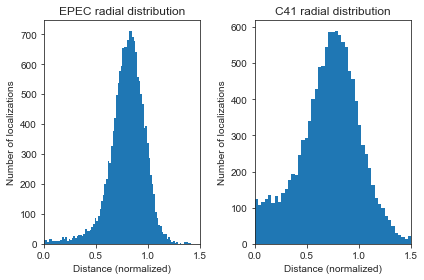

In [21]:
c41_clp = CellListPlot(c41_cells[::1])
epec_clp = CellListPlot(epec_cells[::1])

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

epec_clp.hist_r_storm(data_name='st_yes', ax=ax1, linewidth=0)
c41_clp.hist_r_storm(data_name='st_yes', ax=ax2, linewidth=0)

ax1.set_xlim(0, 1.5)
ax1.set_xlabel('Distance (normalized)')
ax1.set_title('EPEC radial distribution')

ax2.set_xlabel('Distance (normalized)')
ax2.set_title('C41 radial distribution')
plt.tight_layout()

plt.savefig('../figures/Radial distributions.png')
plt.savefig('../figures/Radial distributions.pdf')
plt.savefig('../figures/Radial distributions.eps')

2140.445441823888 2.208130081300813 aht20_20190930_epec_filtered
1240.947499842583 0.9642406394615061 aht20_20191001_epec_filtered
903.7103729879298 0.6562184024266936 aht20_20191002_03_epec_filtered
1740.2358877544054 1.9529685264663805 aht20_20191002_04_epec_filtered
1774.4097495663273 0.87928007023705 aht20_20191023_c41_filtered
981.5356264546585 0.22701612903225807 aht25_20191010_01_c41_filtered
2026.8756447648257 1.4423398328690809 aht25_20191010_02_c41_filtered
1306.424098567621 0.22904062229904926 aht25_20191010_03_c41_filtered
2090.4898739895248 1.4173764906303237 aht25_20191023_c41_filtered
2255.3298513250884 2.2 aht30_20191005_02_c41_filtered
1966.0957814237522 1.1670644391408114 aht30_20191009_01_c41_filtered
1911.6474190898011 1.035016286644951 aht30_20191009_02_c41_filtered
2187.9212511403134 2.5336538461538463 aht30_20191022_epec_filtered


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

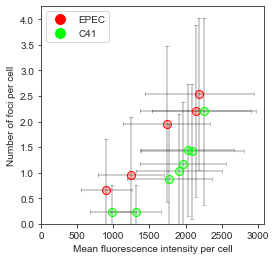

In [22]:
c41_rgb = [0, 1, 0]
epec_rgb = [1, 0, 0]

plt.figure(figsize=(4,4))
for k, v in cells_dict.items():

    i = v.get_intensity()
    s = np.array([len(c.data.data_dict['st_yes']) for c in v])

    print(i.mean(), s.mean(), k)

    if 'c41' in k:
      #  color=[0, 1, 0, 0.25]
        mfc = c41_rgb +  [0.25]
        mec = c41_rgb + [1]
    elif 'epec' in k:
        mfc=epec_rgb + [0.25]
        mec = epec_rgb + [1]

    marker='o'
    markers, caps, bars = plt.errorbar(i.mean(), s.mean(), xerr=i.std() , yerr=s.std(),
                                       ecolor='k', capsize=2, markerfacecolor=mfc,
                                       markeredgecolor=mec,fmt=marker, markersize=8)
    alpha = 0.5

    [bar.set_alpha(0.25) for bar in bars]
    [cap.set_alpha(0.25) for cap in caps]

legend_elements = [
                   Line2D([0], [0], markerfacecolor=epec_rgb, label='EPEC', marker='o', color='w', markersize=12),
                    Line2D([0], [0], markerfacecolor=c41_rgb, label='C41', marker='o', color='w', markersize=12),
                  ]

plt.legend(handles=legend_elements)
plt.xlabel('Mean fluorescence intensity per cell')
plt.ylabel('Number of foci per cell')

plt.xlim(0, None)
plt.ylim(0, None)

plt.savefig('../figures/Intensity VS Spots.png')
plt.savefig('../figures/Intensity VS Spots.pdf')
plt.savefig('../figures/Intensity VS Spots.eps')